In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# mediante la función make creamos el entorno de rl a simular (taxi-v3)
# el entorno consiste en la simulación de un proceso de decisión de markov.
#env = gym.make("Taxi-v3", render_mode="rgb_array_list")
env = gym.make("Taxi-v3", render_mode="rgb_array")

Timesteps taken: 50
Total Reward: 0


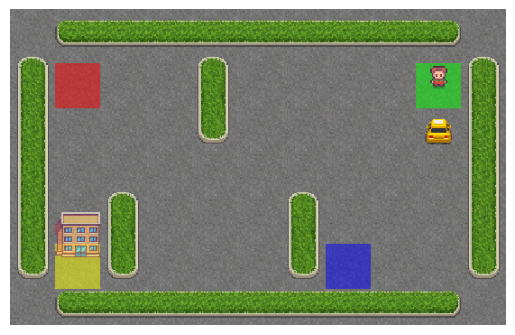

In [4]:
# 1.- Vamos a ejecutar una estrategia con acciones escogidas al azar.
#env.s = 328  # set environment to illustration's state
import time
epochs = 0
penalties, reward = 0, 0
G = 0
frames = [] # for animation
done = False
observation, info = env.reset(seed=42)
#while not done:
for i in range(50):

    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    time.sleep(0.05)
    action = env.action_space.sample() # muestreamos una acción al azar
    state, reward, done, truncated,info = env.step(action) # ejecutamos dicha acción en nuestro entorno.
    
    G += reward
    epochs += 1

    
print("Timesteps taken: {}".format(epochs))
print("Total Reward: {}".format(penalties))

# 1 Vamos a extraer el MDP del entorno #

In [5]:
import gymnasium as gym
import numpy as np
from collections import defaultdict

env = gym.make("Taxi-v3")
n_states = env.observation_space.n
n_actions = env.action_space.n

# Construimos las probabilidades de transición. P[s][a] = (next_s, r, done)
# Realmente crea el siguiente estado y premio después
# de aplicar una acción porque el entorno es determinista
P = defaultdict(dict)

for s in range(n_states):
    for a in range(n_actions):
        env.reset()
        env.unwrapped.s = s  # force environment to a specific state
        next_s, r, terminated, truncated, _ = env.step(a)
        done = terminated or truncated
        P[s][a] = (next_s, r, done)


# 2. Implementamos Policy iteration
## 2.1. Incializamos v, policy y algunos parámetros

In [8]:
# Vamos a construir la mejor estrategia a partir de la programación dinámica

# Inicializamos a cero nuestros Values
V = np.zeros(n_states)
policy = np.random.choice(n_actions, size=n_states)

# Algunos parámetros:
# gamma -> penalización de premios a largo plazo.
# theta, cuando consideremos que vi - vi+1 = theta paramos.
gamma = 0.99
theta = 1e-4
stable = False

## 2.2. Bucle de policy iteration:

```python
while not policy_stable:
    # 1. Policy Evaluation
    evaluate current policy to compute V(s) for all states

    # 2. Policy Improvement
    update policy to be greedy with respect to V(s)


In [9]:
iteration = 0
while not stable:
    iteration += 1

    # Policy Evaluation
    delta_eval = 0
    bigger_than_delta = True
    while bigger_than_delta:
        delta_eval +=1
        delta = 0
        for s in range(n_states):
            a = policy[s]
            next_s, r, done = P[s][a]
            v = V[s]
            # actualizamos v con el valor 
            V[s] = r + gamma * V[next_s]
            delta = max(delta, abs(v - V[s]))
        if delta < theta: # policy update is below and threhsold
            bigger_than_delta = False
    stable = True

    # Policy improve
    for s in range(n_states):
        old_action = policy[s]
        action_values = np.zeros(n_actions)
        for a in range(n_actions):
            next_s, r, done = P[s][a]
            action_values[a] = r + gamma * V[next_s]
        best_a = np.argmax(action_values) # get a with max q for each state.
        policy[s] = best_a
        if old_action != best_a:
            stable = False

In [10]:
print(f"✅ Policy iteration converged in {iteration} iterations.")

✅ Policy iteration converged in 16 iterations.


## 2.2 Evaluar el resultado

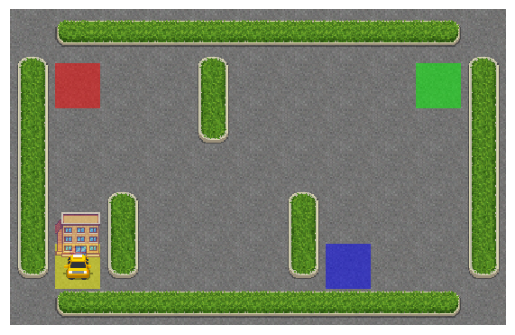

🎉 Total reward: -120


In [15]:
import time
env = gym.make("Taxi-v3", render_mode="rgb_array")
state, _ = env.reset()
done = False
total_reward = 0

while not done:
    # Render the frame (returns RGB image)
    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    time.sleep(0.9)

    action = policy[state]
    state, reward, terminated, truncated,info = env.step(action)
    total_reward += r
    done = terminated or truncated

# Final frame
plt.imshow(env.render())
plt.axis("off")
plt.show()

print(f"🎉 Total reward: {total_reward}")
env.close()


# 3. Optimizar usando Value iteration
# 3.1 value iteration

In [16]:
import gymnasium as gym
import numpy as np

V = np.zeros(n_states)
gamma = 0.99
theta = 1e-4

iteration = 0
while True:
    delta = 0
    for s in range(n_states):
        v = V[s]
        # Compute max_a Q(s, a)
        q_values = np.zeros(n_actions)
        for a in range(n_actions):
            next_s, r, done = P[s][a]
            q_values[a] = r + gamma * V[next_s]
    
        V[s] = np.max(q_values)
        delta = max(delta, abs(v - V[s]))
    
    iteration += 1
    if delta < theta:
        break

print(f"✅ Value iteration converged in {iteration} iterations.")


✅ Value iteration converged in 610 iterations.


In [17]:
# Derive policy from final value function
policy = np.zeros(n_states, dtype=int)
for s in range(n_states):
    q_values = np.zeros(n_actions)
    for a in range(n_actions):
        next_s, r, done = P[s][a]
        q_values[a]= r + gamma * V[next_s] 

    policy[s] = np.argmax(q_values)

## 3.2 Evaluar el resultado

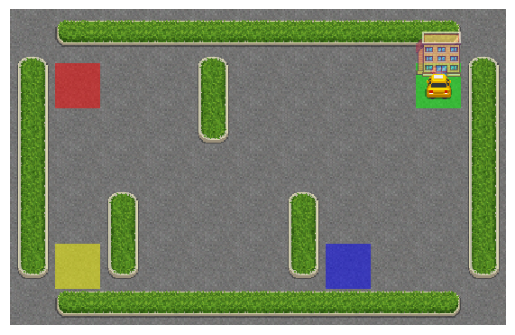

🎉 Total reward: -170


In [20]:
import time
env = gym.make("Taxi-v3", render_mode="rgb_array")
state, _ = env.reset()
done = False
total_reward = 0

while not done:
    # Render the frame (returns RGB image)
    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    time.sleep(0.3)

    action = policy[state]
    state, reward, terminated, truncated,info = env.step(action)
    total_reward += r
    done = terminated or truncated

# Final frame
plt.imshow(env.render())
plt.axis("off")
plt.show()

print(f"🎉 Total reward: {total_reward}")
env.close()